# Finding Metro Sales Price Trends

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
from fbprophet import Prophet

In [2]:
metro_ts = pd.read_csv("./../src/data/raw/MetroSalesPrices.csv")
metro_ts
N = 30

In [3]:
top_ten = metro_ts[metro_ts.SizeRank < N]

metro_datasets = {}
for city_str in list(top_ten["RegionName"]): #Get city string
    #Get sample data with NY into right shape
    city_prices = metro_ts[metro_ts.RegionName == city_str].iloc[:,3:]
    ds = city_prices.columns
    city_prices = city_prices.T
    ds = pd.to_datetime(ds, infer_datetime_format = True)
    city_prices["ds"] = ds
    city_prices.columns = ["y","ds"]
    city_prices = city_prices.query("y.notnull()")
    metro_datasets[city_str] = city_prices.copy()
    print(f"{city_str}\n{city_prices}\n")
metro_datasets.keys()

United States
                y         ds
2008-03  182900.0 2008-03-01
2008-04  179300.0 2008-04-01
2008-05  175300.0 2008-05-01
2008-06  172100.0 2008-06-01
2008-07  171000.0 2008-07-01
...           ...        ...
2019-05  232100.0 2019-05-01
2019-06  232700.0 2019-06-01
2019-07  233500.0 2019-07-01
2019-08  234400.0 2019-08-01
2019-09  234800.0 2019-09-01

[139 rows x 2 columns]

New York, NY
                y         ds
2010-12  362200.0 2010-12-01
2011-01  362800.0 2011-01-01
2011-02  362000.0 2011-02-01
2011-03  361700.0 2011-03-01
2011-04  362100.0 2011-04-01
...           ...        ...
2019-05  392400.0 2019-05-01
2019-06  393700.0 2019-06-01
2019-07  394900.0 2019-07-01
2019-08  395600.0 2019-08-01
2019-09  397800.0 2019-09-01

[106 rows x 2 columns]

Los Angeles-Long Beach-Anaheim, CA
                y         ds
2008-03  471300.0 2008-03-01
2008-04  459500.0 2008-04-01
2008-05  443100.0 2008-05-01
2008-06  432100.0 2008-06-01
2008-07  417900.0 2008-07-01
...           ... 

dict_keys(['United States', 'New York, NY', 'Los Angeles-Long Beach-Anaheim, CA', 'Chicago, IL', 'Dallas-Fort Worth, TX', 'Philadelphia, PA', 'Houston, TX', 'Washington, DC', 'Miami-Fort Lauderdale, FL', 'Atlanta, GA', 'Boston, MA', 'San Francisco, CA', 'Riverside, CA', 'Phoenix, AZ', 'Seattle, WA', 'Minneapolis-St Paul, MN', 'San Diego, CA', 'St. Louis, MO', 'Tampa, FL', 'Baltimore, MD', 'Denver, CO', 'Pittsburgh, PA', 'Portland, OR', 'Charlotte, NC', 'Sacramento, CA', 'San Antonio, TX', 'Orlando, FL', 'Cincinnati, OH', 'Cleveland, OH', 'Kansas City, MO'])

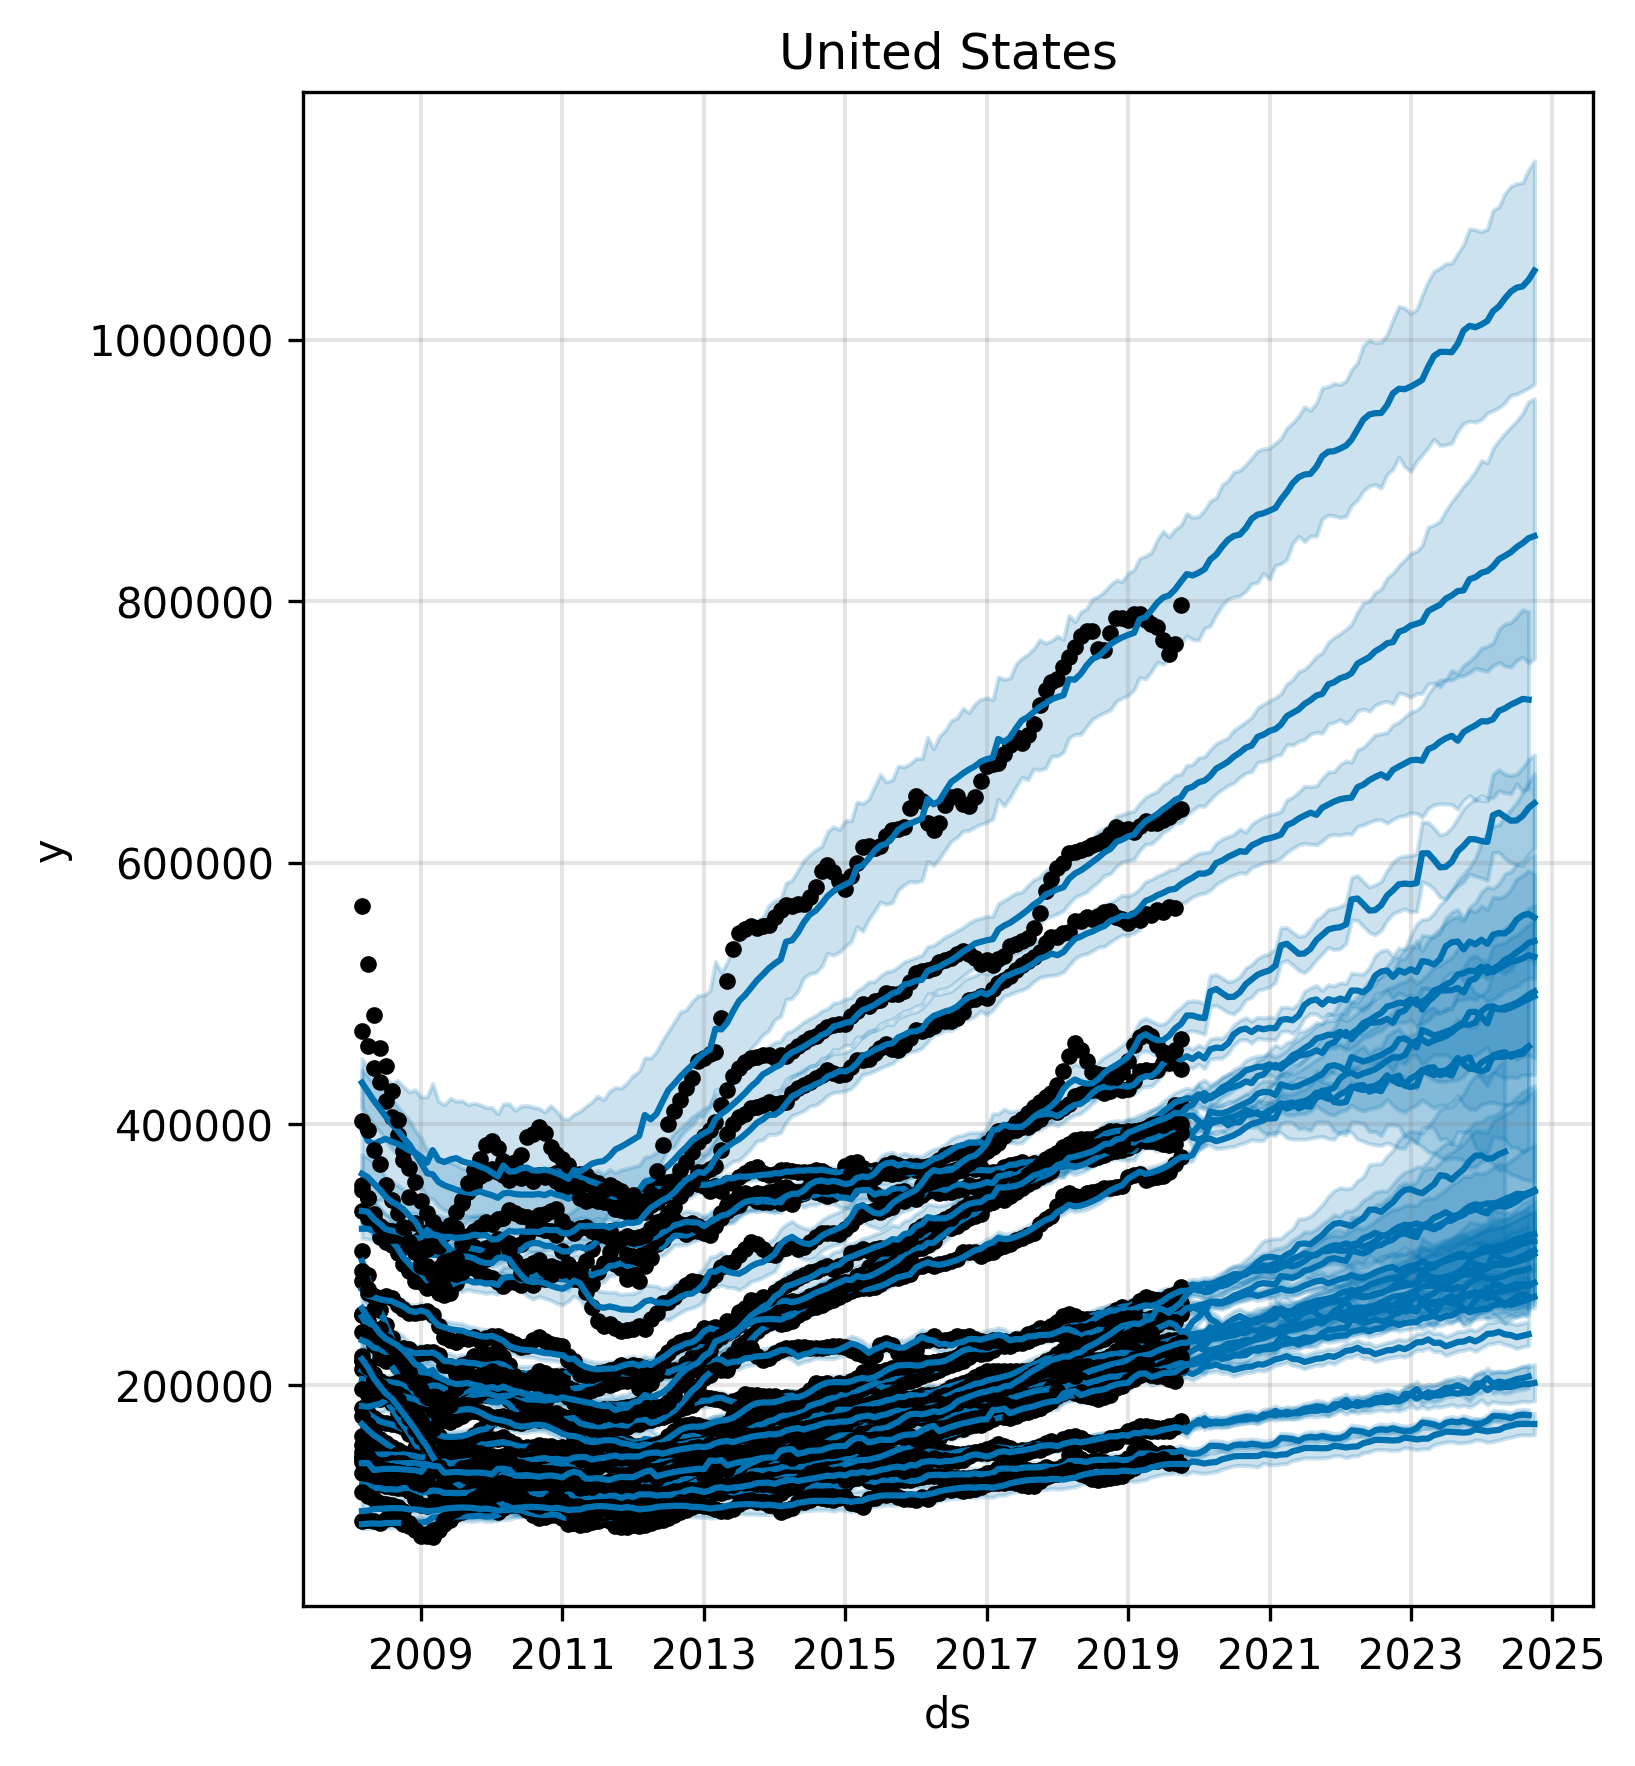

In [6]:
# get some prophet going
fig = plt.figure(facecolor='w', figsize=(10,10), dpi=300)
#fig = plt.figure(facecolor='w', figsize=(10,10), dpi=300).title("Median Housing Price").ylabel("Median Housing Price").xlabel("Year")
pos = 1
ax = None
for (city_str, city_prices) in metro_datasets.items():
    machine_learning = Prophet(yearly_seasonality = True,weekly_seasonality=False,daily_seasonality=False, seasonality_prior_scale=0.1)
    machine_learning.fit(city_prices)
    future = machine_learning.make_future_dataframe(periods=60, freq = 'm')
    prediction = machine_learning.predict(future)
    if ax is not None:
        #ax = fig.add_subplot((N/2 + 1), 2, pos, xlabel="Year", ylabel="Median Home Price", sharex = ax, sharey = ax, title = city_str)
        ax = fig.add_subplot(ax)
    else:
        ax = fig.add_subplot((N/2 + 1), 2, pos, xlabel="Year", ylabel="Median Home Price", title = city_str)
        #ax = fig.add_subplot(1,1, 1, xlabel="Year", ylabel="Median Home Price", )
    pos += 1
    fig = machine_learning.plot(prediction, ax=ax)